## MNIST 데이터셋을 활용한 이진분류

In [21]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import random
import sklearn as sk
from sklearn.model_selection import train_test_split

import pathlib
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from sklearn.model_selection import train_test_split

print(tf.__version__)
#시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

2.8.0


1(a). 주어진 데이터를 train, validation, test data로 각각 나누고 keras를 이용하여 MLP 모델을 fitting한 뒤, train data와 validation data에 대한 learning curve를 시각화하시오.

In [22]:
MNIST_train = pd.read_csv('https://raw.githubusercontent.com/kjmgithub/practice/main/train.csv')
MNIST_test = pd.read_csv('https://raw.githubusercontent.com/kjmgithub/practice/main/test.csv')

In [23]:
MNIST_train['result'] = np.where(MNIST_train['label'] == 0, 0, 1)
MNIST_test['result'] = np.where(MNIST_test['label'] == 0, 0, 1)

In [24]:
x = MNIST_train.iloc[:,:784]
y = MNIST_train.iloc[:,785]

In [25]:
x

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54173,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54174,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54175,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
y

0        1
1        1
2        1
3        1
4        1
        ..
54172    0
54173    0
54174    0
54175    0
54176    0
Name: result, Length: 54177, dtype: int64

In [27]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

In [28]:
model =keras.models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(784,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
85/85 [==============================] - 2s 11ms/step - loss: 0.1219 - accuracy: 0.9955 - val_loss: 0.0155 - val_accuracy: 0.9984
Epoch 2/20
85/85 [==============================] - 1s 8ms/step - loss: 0.0151 - accuracy: 0.9980 - val_loss: 0.0077 - val_accuracy: 0.9981
Epoch 3/20
85/85 [==============================] - 1s 9ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0096 - val_accuracy: 0.9983
Epoch 4/20
85/85 [==============================] - 1s 9ms/step - loss: 0.0068 - accuracy: 0.9986 - val_loss: 0.0050 - val_accuracy: 0.9989
Epoch 5/20
85/85 [==============================] - 1s 8ms/step - loss: 0.0084 - accuracy: 0.9988 - val_loss: 0.0087 - val_accuracy: 0.9988
Epoch 6/20
85/85 [==============================] - 1s 9ms/step - loss: 0.0041 - accuracy: 0.9992 - val_loss: 0.0095 - val_accuracy: 0.9992
Epoch 7/20
85/85 [==============================] - 1s 9ms/step - loss: 0.0043 - accuracy: 0.9991 - val_loss: 0.0119 - val_accuracy: 0.9994
Epoch 8/20
85/85 [=

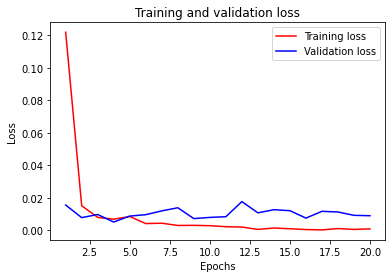

In [30]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')  
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

1(b). 데이터의 분포를 시각화해서 살펴보시오. 


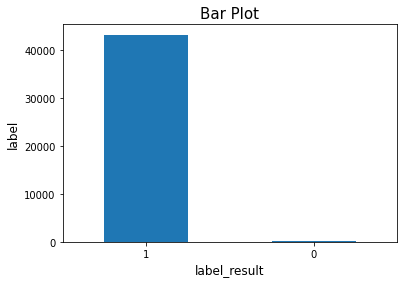

In [31]:
y_train.value_counts().plot(kind='bar')
plt.title("Bar Plot", fontsize=15)
plt.ylabel("label", fontsize=12)
plt.xlabel("label_result", fontsize=12)
plt.xticks(rotation=0)
plt.show()

1(c). 학습 결과를 Confusion matrix를 가지고 평가하시오.

In [32]:
X = MNIST_test.iloc[:,:784]
Y = MNIST_test.iloc[:,785]

In [33]:
Y_predict = model.predict(X)

In [34]:
Y_pred = []
for x in Y_predict:
  if x >= 0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)

In [35]:
conf_matrix = sk.metrics.confusion_matrix(Y, Y_pred)

In [36]:
sum(Y_pred)

9250

In [37]:
confusion_matrix = DataFrame(conf_matrix, index=['실제값(N)', '실제값(P)'], columns=['예측값(N)', '예측값(P)'])
confusion_matrix

,예측값(N),예측값(P)
실제값(N),745,235
실제값(P),5,9015


1(d). (a)에서 학습된 모델을 metric을 통해 평가하는데, 이때 여러 metric(accuracy, precision, recall, f1…)들을 사용해 보고 어느 metric이 적절한지 기술하시오.


In [38]:
TP = confusion_matrix['예측값(P)']['실제값(P)']
FP = confusion_matrix['예측값(P)']['실제값(N)']
TN = confusion_matrix['예측값(N)']['실제값(N)']
FN = confusion_matrix['예측값(N)']['실제값(P)']

In [39]:
accuracy = (TP+TN) / (TP+ TN+ FP+ FN)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
precision = TP/(TP+FP)
F1 = 2 * (precision*recall) / (precision + recall)

In [40]:
print("accuracy = ", accuracy)
print("recall = ", recall)
print("specificity = ", specificity)
print("precision = ", precision)
print("F1 = ", F1)

accuracy =  0.976
recall =  0.9994456762749445
specificity =  0.7602040816326531
precision =  0.9745945945945946
F1 =  0.9868637110016419
